# Demo: Statistical Foundations I

## Part 1: Why Statistical Analysis is required?

In [ ]:
#pip install --upgrade xlrd

In [4]:
import pandas as pd
import numpy as np

In [ ]:
!wget https://www.dropbox.com/s/755hnawo000aeaw/Placement_Data_Full_Class.csv

--2022-12-10 03:19:22--  https://www.dropbox.com/s/755hnawo000aeaw/Placement_Data_Full_Class.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/755hnawo000aeaw/Placement_Data_Full_Class.csv [following]
--2022-12-10 03:19:23--  https://www.dropbox.com/s/raw/755hnawo000aeaw/Placement_Data_Full_Class.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc81d089a3c6d3f2be1dc10be9fc.dl.dropboxusercontent.com/cd/0/inline/ByVPzVrQbwEO8ekh9vTWctxeMUQvKr071BaJ0azt2b16yMyEsBP8n7d3BrZOO3GYC97PcmbxLoav6nlyJ3dRZ0IQREXRIpU5W3s2Q2C-ftAzUJAK0ueRlii_2zdy1PvIigjJlv1z9I0JeLrkiQ3fT-KgDW2qyvkKaFIE2bc4ZhZoWg/file# [following]
--2022-12-10 03:19:23--  https://uc81d089a3c6d3f2be1dc10be9fc.dl.dropboxusercontent.com/cd/0/inline/ByVPzVrQbwEO8ekh9vTWctxeMUQvK

In [ ]:
campus = pd.read_csv('/content/Placement_Data_Full_Class.csv')
print(campus.shape)
campus.head()

(215, 15)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
campus.degree_t.unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [ ]:
pd.crosstab(index=campus['status'], columns=campus['degree_t'], normalize=True).round(4)*100

degree_t,Comm&Mgmt,Others,Sci&Tech
status,,,
Not Placed,20.00,2.79,8.37
Placed,47.44,2.33,19.07


In [ ]:
# pt = pd.crosstab(index=campus['status'], columns=campus['degree_t'], normalize=True)
pt = pd.crosstab(index=campus['status'], columns=campus['degree_t'], normalize=True).round(4)*100
pt

In [ ]:
pt = pd.crosstab(index=campus['status'], columns=campus['specialisation'], normalize=True).round(4)*100
pt

specialisation,Mkt&Fin,Mkt&HR
status,,
Not Placed,11.63,19.53
Placed,44.19,24.65


## Part 2: Measures of Central Tendency
- What is the average sales of products between the year 2014 and 2018 and, also find the average amount of products purchased by customers?
- What is the median profit gained between the years 2014 and 2018?
- Find out the most sold product in the US

In [2]:
#Downloading the Dataset from the Dropbox

!wget https://www.dropbox.com/s/kpzd0uzqczklfly/US%20Superstore%20data.xls

--2022-12-11 02:36:41--  https://www.dropbox.com/s/kpzd0uzqczklfly/US%20Superstore%20data.xls
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/kpzd0uzqczklfly/US%20Superstore%20data.xls [following]
--2022-12-11 02:36:41--  https://www.dropbox.com/s/raw/kpzd0uzqczklfly/US%20Superstore%20data.xls
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0c625ea79e0428f8834125c1f2.dl.dropboxusercontent.com/cd/0/inline/BybBl1NIDNu9G5ym1tCN8D6WqbT4Aygy9EUIZHoL5ojdQ1SSzXemsYFAd7LUxYKp5eVG-I5aDe-5Ww3Tm6GK79JXJhcCXoQYWUgBCsaAThCQPH3qJkaJL1sNZHmKIpEeML9cYvZwJmfl3nmUqMb3JbdUrHpDeGGd8nAgDquzc0g42A/file# [following]
--2022-12-11 02:36:42--  https://uc0c625ea79e0428f8834125c1f2.dl.dropboxusercontent.com/cd/0/inline/BybBl1NIDNu9G5ym1tCN8D6WqbT4Aygy9EU

In [5]:
df = pd.read_excel('/content/US Superstore data.xls')
print(df.shape)
df.head()

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Task 1: Mean
What is the average sales of products between the year 2014 and 2018 and, also find the average amount of products purchased by customers?



In [ ]:
df.Sales.mean().round(2), df.Quantity.mean().round(2)

(229.86, 3.79)

In [ ]:
df['Ship Date'].max(), df['Ship Date'].min()

(Timestamp('2018-01-05 00:00:00'), Timestamp('2014-01-07 00:00:00'))

In [ ]:
df2 = df[['Quantity', 'Sales']]
type(df2)

pandas.core.frame.DataFrame

In [ ]:
meanData = df2.mean()
print(type(meanData))
meanData

<class 'pandas.core.series.Series'>


Quantity      3.789574
Sales       229.858001
dtype: float64

In [ ]:
meanData = meanData.round()
type(meanData)

pandas.core.series.Series

In [ ]:
avgSales = meanData['Sales']
avgQuantity = meanData['Quantity']
print(avgSales, type(avgSales))
print(avgQuantity, type(avgQuantity))

230.0 <class 'numpy.float64'>
4.0 <class 'numpy.float64'>


In [ ]:
df[['Quantity', 'Sales']].mean().round(2)

In [ ]:
df[['Quantity', 'Sales']].mean()

In [ ]:
meanData = df[['Quantity', 'Sales']].mean().round(2)
print('Quantity mean:', meanData['Quantity'])
print('Sales mean:', meanData['Sales'])


In [ ]:
print(df[['Quantity', 'Sales']].max())
print(df[['Quantity', 'Sales']].min())

### Task 2: Median
What is the median profit gained between the years 2014 and 2018?



In [ ]:
df.Profit.median().round(2)

8.67

In [ ]:
df2 = df['Profit']
type(df2)

pandas.core.series.Series

In [ ]:
medianProfit = df2.median().round(2)
print(medianProfit)
print(type(medianProfit))

8.67
<class 'numpy.float64'>


In [ ]:
df2.head()

In [ ]:
df['Profit'].median(), df['Profit'].mean()

### Task 3: Mode

Find out the most sold product in the US



In [ ]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [ ]:
df['Product Name'].mode()

0    Staple envelope
dtype: object

In [ ]:
type(df['Product Name'].mode())

pandas.core.series.Series

In [ ]:
df[df['Product Name'] == 'Staple envelope'].shape

In [ ]:
df[df['Product Name'] == "Eldon Fold 'N Roll Cart System"].head()

#### Mean Vs. Median Vs. Mode

In [ ]:
# !wget https://www.dropbox.com/s/755hnawo000aeaw/Placement_Data_Full_Class.csv
# campus = pd.read_csv('Placement_Data_Full_Class.csv')

## Part 3: Data Types



### Qualitative Data & Quantitative Data

In [6]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [7]:
print(df.shape)
df.columns

(9994, 21)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

Text(0, 0.5, 'Sales - Quantitative data type')

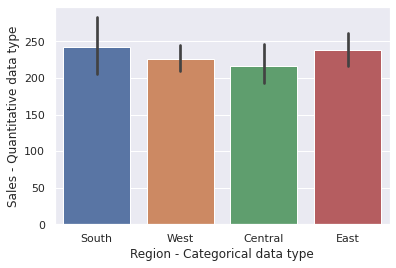

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

sns.barplot(x='Region', y='Sales', data=df)
plt.xlabel('Region - Categorical data type')
plt.ylabel('Sales - Quantitative data type')

#### Catergorical/Qualitative Data
- Nominal
- Ordinal    


##### Nominal Data

In [10]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [11]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

##### Ordinal Data

In [12]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

#### Numerical / Quantitative Data
- Discrete
- Continuous   


In [13]:
print(df.shape)
df.columns

(9994, 21)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

##### Discrete Data

In [14]:
df_new = pd.DataFrame(df[['Customer ID','Quantity']])
print(df_new.shape)
df_new.head()

(9994, 2)


,Customer ID,Quantity
0,CG-12520,2
1,CG-12520,3
2,DV-13045,2
3,SO-20335,5
4,SO-20335,2


In [15]:
df.Quantity.mean()

3.789573744246548

##### Continuous Data

In [16]:
df_new = pd.DataFrame(df[['Customer ID','Sales','Profit','Discount']])
print(df_new.shape)
df_new.head()

(9994, 4)


,Customer ID,Sales,Profit,Discount
0,CG-12520,261.9600,41.9136,0.00
1,CG-12520,731.9400,219.5820,0.00
2,DV-13045,14.6200,6.8714,0.00
3,SO-20335,957.5775,-383.0310,0.45
4,SO-20335,22.3680,2.5164,0.20


##**Why Learn Statistics?**

- Important for [Data Science Interviews](https://www.edureka.co/blog/interview-questions/data-science-interview-questions/#statistics)
- It's a fundamental concept
- Your basics must be clear before going on advanced topics

[Online statistics book](https://onlinestatbook.com/) - David Lane